1. What is the most expensive app on the Play Store?
2. Which genre has the highest number of apps?
3. What is the average size of free vs. paid apps?
4. What are the top 5 most expensive apps with a perfect rating (5)?
5. How many apps have received more than 50K reviews?
6. What is the average price of apps, grouped by genre and number of installs?
7. How many apps have a rating higher than 4.7, and what is their average price?
8. What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)
9. What are the maximum and minimum sizes of free vs. paid apps?
10. Is there a correlation between an app’s rating, number of reviews, size, and its price?
11. How many apps exist for each type (free/paid) across different content ratings?
12. How many apps are compatible with Android version 4.x?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('googleplaystore.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.dropna(subset=['Type','Content Rating','Current Ver','Android Ver'], inplace=True)

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
def unique_values_per_column(df):

  unique_values = {}
  for col in df.columns:
      unique_values[col] = df[col].unique()
  return pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique Values'])


unique_df = unique_values_per_column(data)
unique_df

,Column,Unique Values
0,App,[Photo Editor & Candy Camera & Grid & ScrapBoo...
1,Category,"[ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO..."
2,Rating,"[4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, ..."
3,Reviews,"[159, 967, 87510, 215644, 167, 178, 36815, 137..."
4,Size,"[19M, 14M, 8.7M, 25M, 2.8M, 5.6M, 29M, 33M, 3...."
5,Installs,"[10,000+, 500,000+, 5,000,000+, 50,000,000+, 1..."
6,Type,"[Free, Paid]"
7,Price,"[0, $4.99, $3.99, $6.99, $1.49, $2.99, $7.99, ..."
8,Content Rating,"[Everyone, Teen, Everyone 10+, Mature 17+, Adu..."
9,Genres,"[Art & Design, Art & Design;Pretend Play, Art ..."


In [ ]:
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

<ipython-input-11-bb8061ab9b03>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].mean(), inplace=True)


In [ ]:
data['Price'] = data['Price'].astype(str).str.replace('$', '', regex=False)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

In [ ]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [ ]:
def clean_installs(installs):
    if isinstance(installs, str):
        installs = installs.replace('+', '').replace(',', '')
        return int(installs) if installs.isdigit() else np.nan # Handle non-numeric values
    return installs  # Keep original value if not a string


data['Installs'] = data['Installs'].apply(clean_installs)

In [ ]:


# Function to convert size to numeric value
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1000000
        elif 'k' in size:
            return float(size.replace('k', '')) * 1000
        elif size == 'Varies with device':
            return np.nan  # or handle it differently, e.g., with the mean
    return float(size) if pd.notna(size) else np.nan

# Apply the conversion function and handle 'Varies with device'
data['Size'] = data['Size'].apply(convert_size)

# Calculate the mean of 'Size', excluding NaN values
mean_size = data['Size'].mean()

# Fill NaN values in 'Size' (Varies with device) with the mean
data['Size'].fillna(mean_size, inplace=True)

# ... (rest of your code)

<ipython-input-15-67f9f0fa8860>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Size'].fillna(mean_size, inplace=True)


In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**What is the most expensive app on the Play Store?**

In [ ]:
most_expensive_app = data.loc[data['Price'].idxmax()]

print(f"The most expensive app is '{most_expensive_app['App']}' with a price of ${most_expensive_app['Price']}")

The most expensive app is 'I'm Rich - Trump Edition' with a price of $400.0


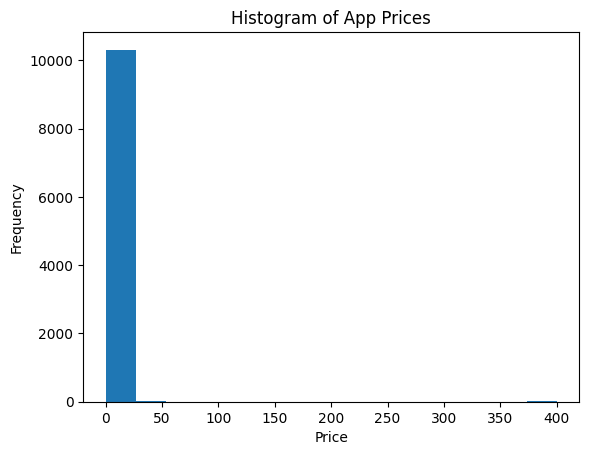

In [ ]:
plt.hist(data['Price'], bins='auto')  # or bins='auto'
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of App Prices')
plt.show()

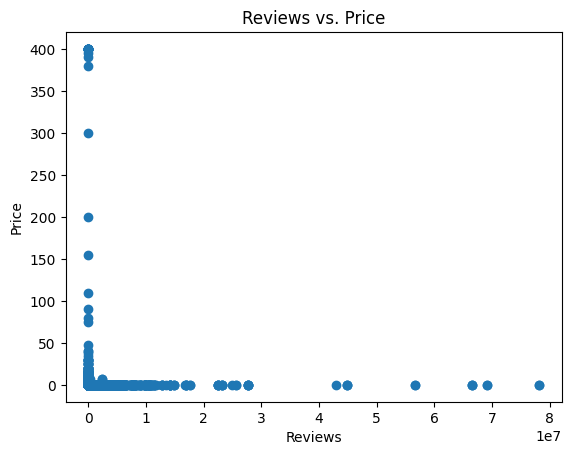

In [ ]:
plt.scatter(data['Reviews'], data['Price'])
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.title('Reviews vs. Price')
plt.show()

**Which genre has the highest number of apps?**

In [ ]:
genre_counts = data['Category'].value_counts()
highest_genre = genre_counts.index[0]
print(f"The genre with the highest number of apps is '{highest_genre}' with {genre_counts[0]} apps.")

The genre with the highest number of apps is 'FAMILY' with 1939 apps.


<ipython-input-20-af38aecbccf1>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The genre with the highest number of apps is '{highest_genre}' with {genre_counts[0]} apps.")


**What is the average size of free vs. paid apps?**

In [ ]:
average_size_free = data[data['Type'] == 'Free']['Size'].mean()
average_size_paid = data[data['Type'] == 'Paid']['Size'].mean()

print(f"Average size of free apps: {average_size_free:.2f} bytes")
print(f"Average size of paid apps: {average_size_paid:.2f} bytes")

Average size of free apps: 21459898.01 bytes
Average size of paid apps: 19378677.61 bytes


**What are the top 5 most expensive apps with a perfect rating (5)?**

In [ ]:
perfect_rated_apps = data[data['Rating'] == 5]

top_5_expensive = perfect_rated_apps.nlargest(5, 'Price')

print("Top 5 most expensive apps with a perfect rating (5):")
print(top_5_expensive[['App', 'Price']])

Top 5 most expensive apps with a perfect rating (5):
                                            App  Price
5489                  AP Art History Flashcards  29.99
7477                 USMLE Step 2 CK Flashcards  19.99
5246                      Hey AJ! It's Bedtime!   4.99
5482                 meStudying: AP English Lit   4.99
7204  TI-84 CE Graphing Calculator Manual TI 84   4.99


**How many apps have received more than 50K reviews?**

In [ ]:
apps_over_50k_reviews = len(data[data['Reviews'] > 50000])
print(f"{apps_over_50k_reviews} apps have received more than 50,000 reviews.")

2525 apps have received more than 50,000 reviews.


**What is the average price of apps, grouped by genre and number of installs?**

In [ ]:
average_price_by_genre_installs = data.groupby(['Category', 'Installs'])['Price'].mean().reset_index()
average_price_by_genre_installs

,Category,Installs,Price
0,ART_AND_DESIGN,0,0.000000
1,ART_AND_DESIGN,100,0.000000
2,ART_AND_DESIGN,1000,0.663333
3,ART_AND_DESIGN,5000,0.497500
4,ART_AND_DESIGN,10000,0.180909
...,...,...,...
509,WEATHER,500000,0.855714
510,WEATHER,1000000,0.000000
511,WEATHER,5000000,0.000000
512,WEATHER,10000000,0.000000


**How many apps have a rating higher than 4.7, and what is their average price?**

In [ ]:
high_rated_apps = data[data['Rating'] > 4.7]
num_high_rated = len(high_rated_apps)
avg_price_high_rated = high_rated_apps['Price'].mean()

print(f"{num_high_rated} apps have a rating higher than 4.7.")
print(f"The average price of these apps is ${avg_price_high_rated:.2f}")

586 apps have a rating higher than 4.7.
The average price of these apps is $0.46


**What is Google's estimated revenue from apps with 5,000,000+ installs? (Assuming Google takes a 30% cut from app sales)**

In [ ]:
high_install_apps = data[data['Installs'] >= 5000000]
estimated_revenue = (high_install_apps['Price'] * 0.3).sum()

print(f"Google's estimated revenue from apps with 5,000,000+ installs is ${estimated_revenue:.2f}")

Google's estimated revenue from apps with 5,000,000+ installs is $4.49


**What are the maximum and minimum sizes of free vs. paid apps?**

In [ ]:
max_size_free = data[data['Type'] == 'Free']['Size'].max()
min_size_free = data[data['Type'] == 'Free']['Size'].min()
max_size_paid = data[data['Type'] == 'Paid']['Size'].max()
min_size_paid = data[data['Type'] == 'Paid']['Size'].min()

print(f"Maximum size of free apps: {max_size_free:.2f} bytes")
print(f"Minimum size of free apps: {min_size_free:.2f} bytes")
print(f"Maximum size of paid apps: {max_size_paid:.2f} bytes")
print(f"Minimum size of paid apps: {min_size_paid:.2f} bytes")

Maximum size of free apps: 100000000.00 bytes
Minimum size of free apps: 8500.00 bytes
Maximum size of paid apps: 100000000.00 bytes
Minimum size of paid apps: 14000.00 bytes


**Is there a correlation between an app’s rating, number of reviews, size, and its price?**

           Rating   Reviews      Size     Price
Rating   1.000000  0.068596  0.073339 -0.020615
Reviews  0.068596  1.000000  0.130465 -0.009424
Size     0.073339  0.130465  1.000000 -0.023807
Price   -0.020615 -0.009424 -0.023807  1.000000


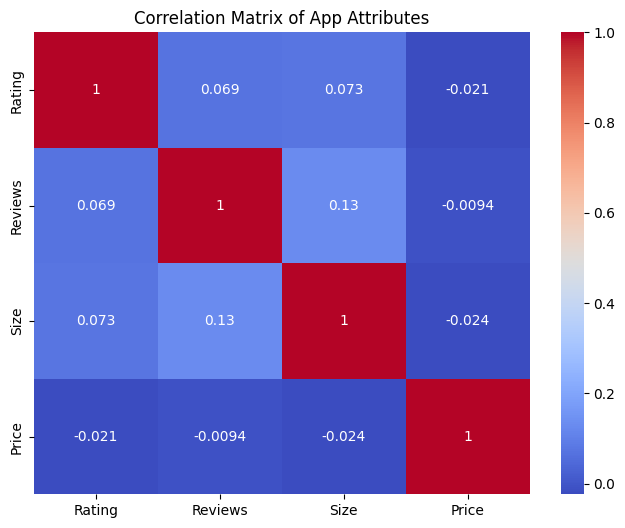

In [ ]:

correlation_matrix = data[['Rating', 'Reviews', 'Size', 'Price']].corr()
print(correlation_matrix)

# Visualization of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of App Attributes')
plt.show()

**How many apps exist for each type (free/paid) across different content ratings?**

In [ ]:
app_counts = data.groupby(['Type', 'Content Rating']).size().unstack(fill_value=0)
app_counts

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3,7713,344,428,1094,2
Paid,0,659,32,19,52,0


**How many apps are compatible with Android version 4.x?**

In [ ]:
android_4x_apps = data[data['Android Ver'].str.startswith('4.')]
num_android_4x_apps = len(android_4x_apps)
print(f"There are {num_android_4x_apps} apps compatible with Android version 4.x.")

There are 6694 apps compatible with Android version 4.x.
